In [ ]:
Load libs

In [ ]:
import os
from src.sentiment import sentiment_score
from src.data_prep import load_news


import matplotlib.pyplot as plt


import seaborn as sns
import pandas as pd

import sys
print(src)


# Add project root to path (one level up from notebook)
ROOT = os.path.abspath("..")
if ROOT not in sys.path:
    sys.path.append(ROOT)


df = load_news("../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


Daily price change


In [ ]:
df['headline_length'] = df['headline'].str.split().str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

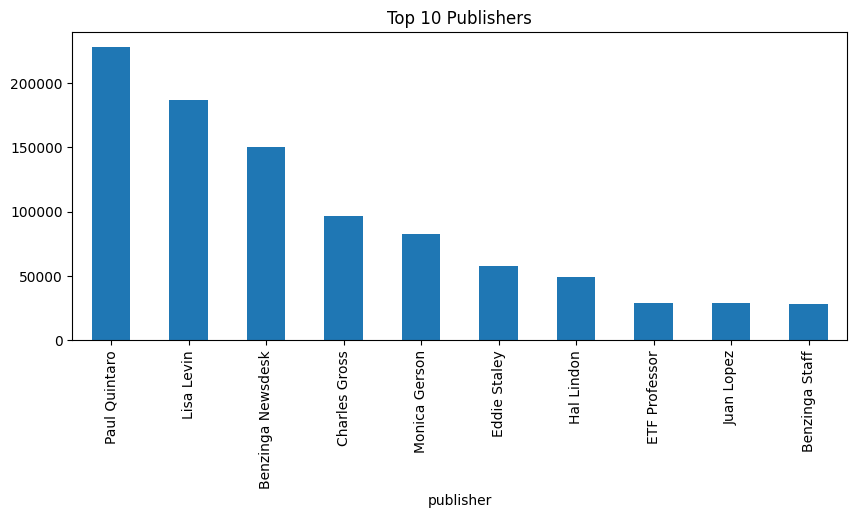

In [ ]:
df['publisher'].value_counts().head(10).plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Publishers")
plt.show()

In [ ]:
df['sentiment'] = df['headline'].apply(sentiment_score)
df[['headline', 'sentiment']].head()

,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,0.000
2,71 Biggest Movers From Friday,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,0.000
4,B of A Securities Maintains Neutral on Agilent...,0.296


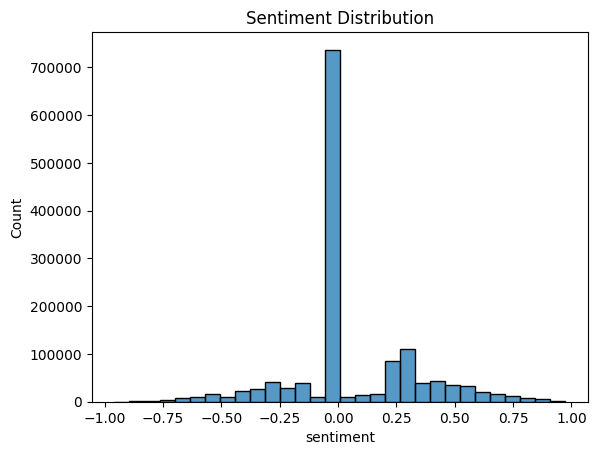

In [ ]:
sns.histplot(df['sentiment'], bins=30)
plt.title("Sentiment Distribution")
plt.show()

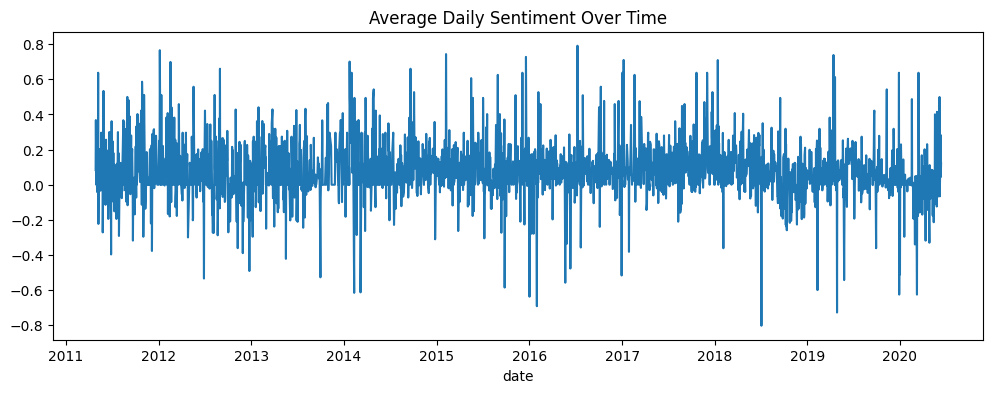

In [ ]:
daily_sent = df.groupby(df['date'].dt.date)['sentiment'].mean()
daily_sent.plot(figsize=(12, 4))
plt.title("Average Daily Sentiment Over Time")
plt.show()

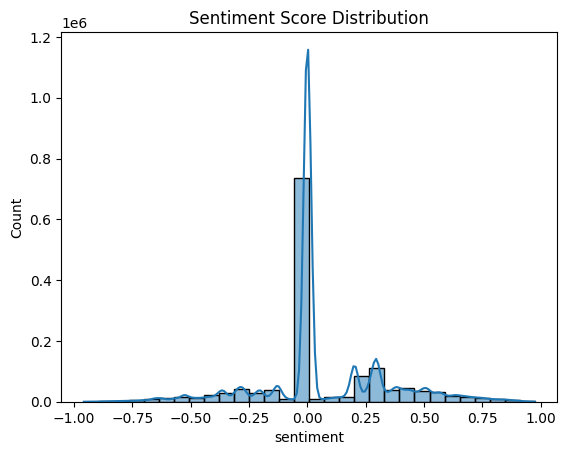

In [ ]:
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

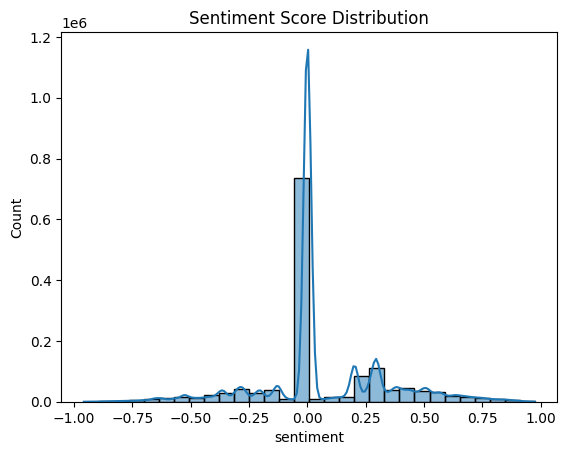

In [ ]:
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

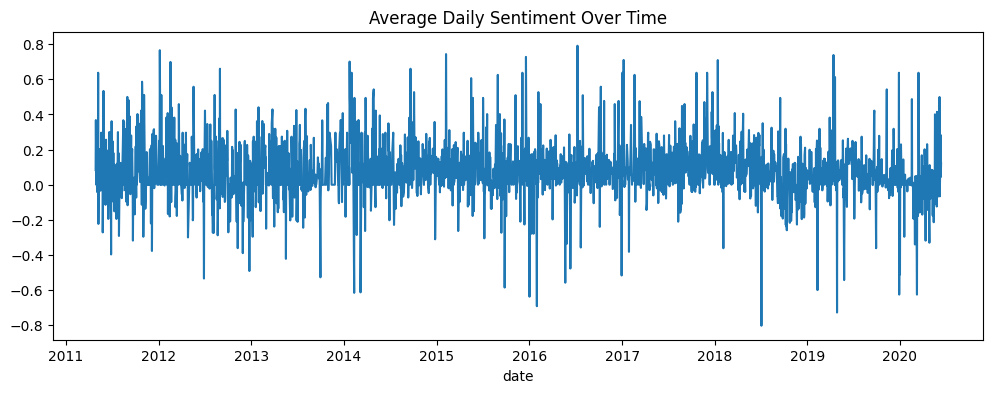

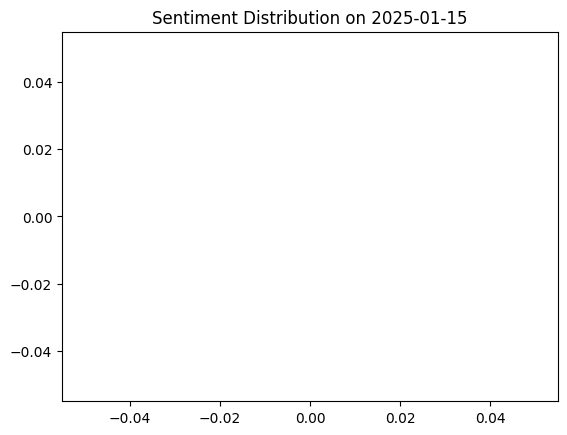

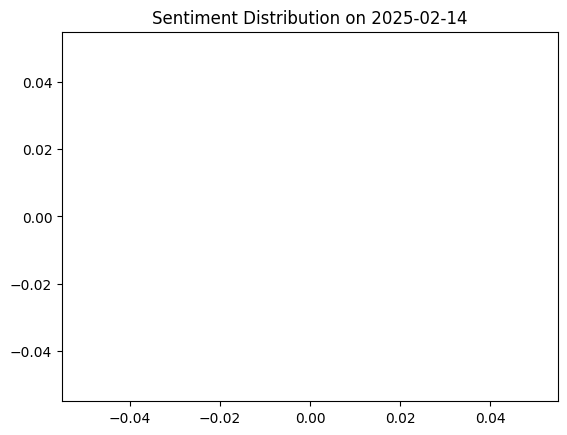

In [ ]:
# Daily Average Sentiment
daily_sent = df.groupby(df['date'].dt.date)['sentiment'].mean()
daily_sent.plot(figsize=(12, 4))
plt.title("Average Daily Sentiment Over Time")
plt.show()

# Event Windows: e.g., earnings days
earnings_days = ['2025-01-15', '2025-02-14']  # Example
for day in earnings_days:
    day_sent = df[df['date'] == day]['sentiment']
    sns.histplot(day_sent, bins=20)
    plt.title(f"Sentiment Distribution on {day}")
    plt.show()

In [ ]:
# Import modules for Task 2
from src.data_prep import load_stock_data, load_multiple_stocks
from src.technical_indicators import add_technical_indicators, calculate_rsi, calculate_macd, calculate_sma
from src.financial_metrics import add_financial_metrics, calculate_daily_returns
import numpy as np

ModuleNotFoundError: No module named 'src'

# Task 2: Quantitative Analysis using Technical Indicators


In [ ]:
# Load stock data
data_dir = "../data"
symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'NVDA']

Loaded 6 stocks
AAPL: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
MSFT: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
GOOG: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
AMZN: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
META: 2923 rows, Date range: 2012-05-18 00:00:00 to 2023-12-29 00:00:00
NVDA: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00


In [ ]:

# Load all stocks
stocks = load_multiple_stocks(data_dir, symbols)
print(f"Loaded {len(stocks)} stocks")
for symbol, df in stocks.items():
    print(
        f"{symbol}: {len(df)} rows, Date range: {df['Date'].min()} to {df['Date'].max()}")

AAPL Data Shape: (3774, 7)

First few rows:
        Date     Close      High       Low      Open      Volume Symbol
0 2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200   AAPL
1 2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400   AAPL
2 2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400   AAPL
3 2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800   AAPL
4 2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800   AAPL

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3774 non-null   datetime64[ns]
 1   Close   3774 non-null   float64       
 2   High    3774 non-null   float64       
 3   Low     3774 non-null   float64       
 4   Open    3774 non-null   float64       
 5   Volume  3774 non-null   int64         
 6   Symbol  3774 non-null   object        
dtypes: da

In [25]:
# Calculate Technical Indicators using TA-Lib/pandas_ta
# Add multiple indicators at once
aapl_with_indicators = add_technical_indicators(
    aapl,
    indicators=['SMA_50', 'SMA_200', 'RSI', ]
)
print("Technical Indicators Added:")
print(aapl_with_indicators[['Date', 'Close', 'SMA_50',
      'SMA_200', 'RSI', ]].tail(10))

Technical Indicators Added:
           Date       Close      SMA_50     SMA_200        RSI
3764 2023-12-15  195.721619  181.953393  175.523846  67.991716
3765 2023-12-18  194.057343  182.322577  175.749070  62.680148
3766 2023-12-19  195.097504  182.682884  175.965682  64.544428
3767 2023-12-20  193.007248  183.013258  176.182843  58.247457
3768 2023-12-21  192.858643  183.312761  176.392996  57.815603
3769 2023-12-22  191.788757  183.572859  176.609048  54.672784
3770 2023-12-26  191.243912  183.858864  176.832686  53.090049
3771 2023-12-27  191.342972  184.149424  177.047100  53.354446
3772 2023-12-28  191.768951  184.479567  177.253187  54.540999
3773 2023-12-29  190.728775  184.814828  177.452099  51.121347


In [ ]:

# Add Financial Metrics
aapl_with_metrics = add_financial_metrics(
    aapl_with_indicators,
    metrics=['returns', 'volatility', 'sharpe', 'drawdown']
)

print("Financial Metrics Added:")
print(aapl_with_metrics[['Date', 'Close', 'Daily_Return',
      'Volatility_30d', 'Drawdown']].tail(10))

Financial Metrics Added:
           Date       Close  Daily_Return  Volatility_30d  Drawdown
3764 2023-12-15  195.721619     -0.002726        0.147393 -0.002726
3765 2023-12-18  194.057343     -0.008503        0.149423 -0.011206
3766 2023-12-19  195.097504      0.005360        0.145833 -0.005906
3767 2023-12-20  193.007248     -0.010714        0.147240 -0.016557
3768 2023-12-21  192.858643     -0.000770        0.147131 -0.017314
3769 2023-12-22  191.788757     -0.005548        0.148199 -0.022765
3770 2023-12-26  191.243912     -0.002841        0.134498 -0.025541
3771 2023-12-27  191.342972      0.000518        0.131291 -0.025037
3772 2023-12-28  191.768951      0.002226        0.125622 -0.022866
3773 2023-12-29  190.728775     -0.005424        0.126878 -0.028166


TypeError: Axes.fill_between() missing 1 required positional argument: 'y1'

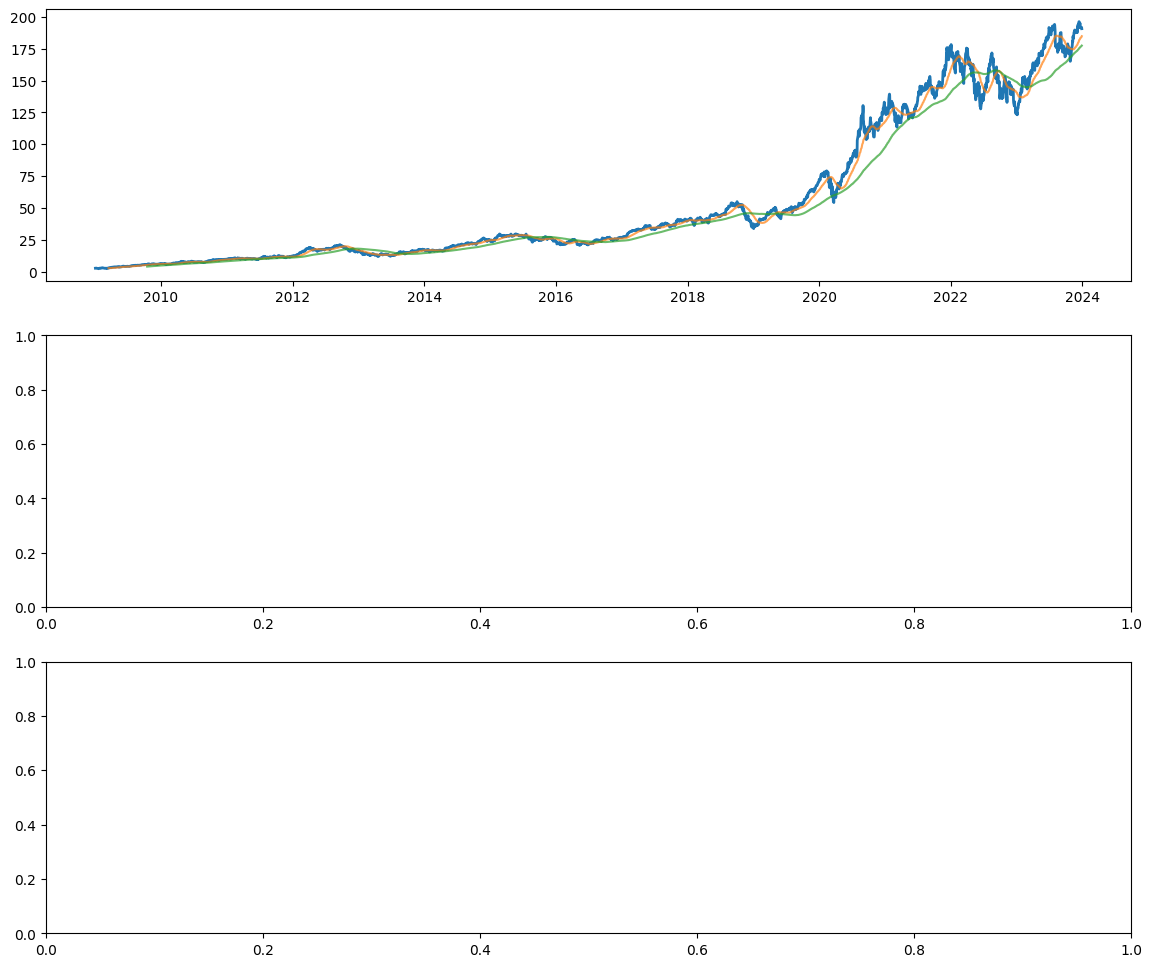

In [ ]:

# Visualize Technical Indicators - Price with Moving Averages
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Price with Moving Averages
ax1 = axes[0]
ax1.plot(aapl_with_metrics['Date'], aapl_with_metrics['Close'],
         label='Close Price', linewidth=2)
ax1.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['SMA_50'], label='SMA 50', alpha=0.7)
ax1.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['SMA_200'], label='SMA 200', alpha=0.7)
ax1.fill_between(aapl_with_metrics['Date'],

                 alpha=0.2, label='Bollinger Bands')
ax1.set_title(
    'AAPL Stock Price with Moving Averages and Bollinger Bands', fontsize=14)
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: RSI
ax2 = axes[1]
ax2.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['RSI'], label='RSI', color='purple')
ax2.axhline(y=70, color='r', linestyle='--',
            alpha=0.5, label='Overbought (70)')
ax2.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
ax2.set_title('Relative Strength Index (RSI)', fontsize=14)
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: MACD
ax3 = axes[2]
ax3.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['MACD'], label='MACD', color='blue')
ax3.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['MACD_signal'], label='Signal', color='red')
ax3.bar(aapl_with_metrics['Date'],
        aapl_with_metrics['MACD_hist'], label='Histogram', alpha=0.3)
ax3.set_title('MACD (Moving Average Convergence Divergence)', fontsize=14)
ax3.set_ylabel('MACD')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

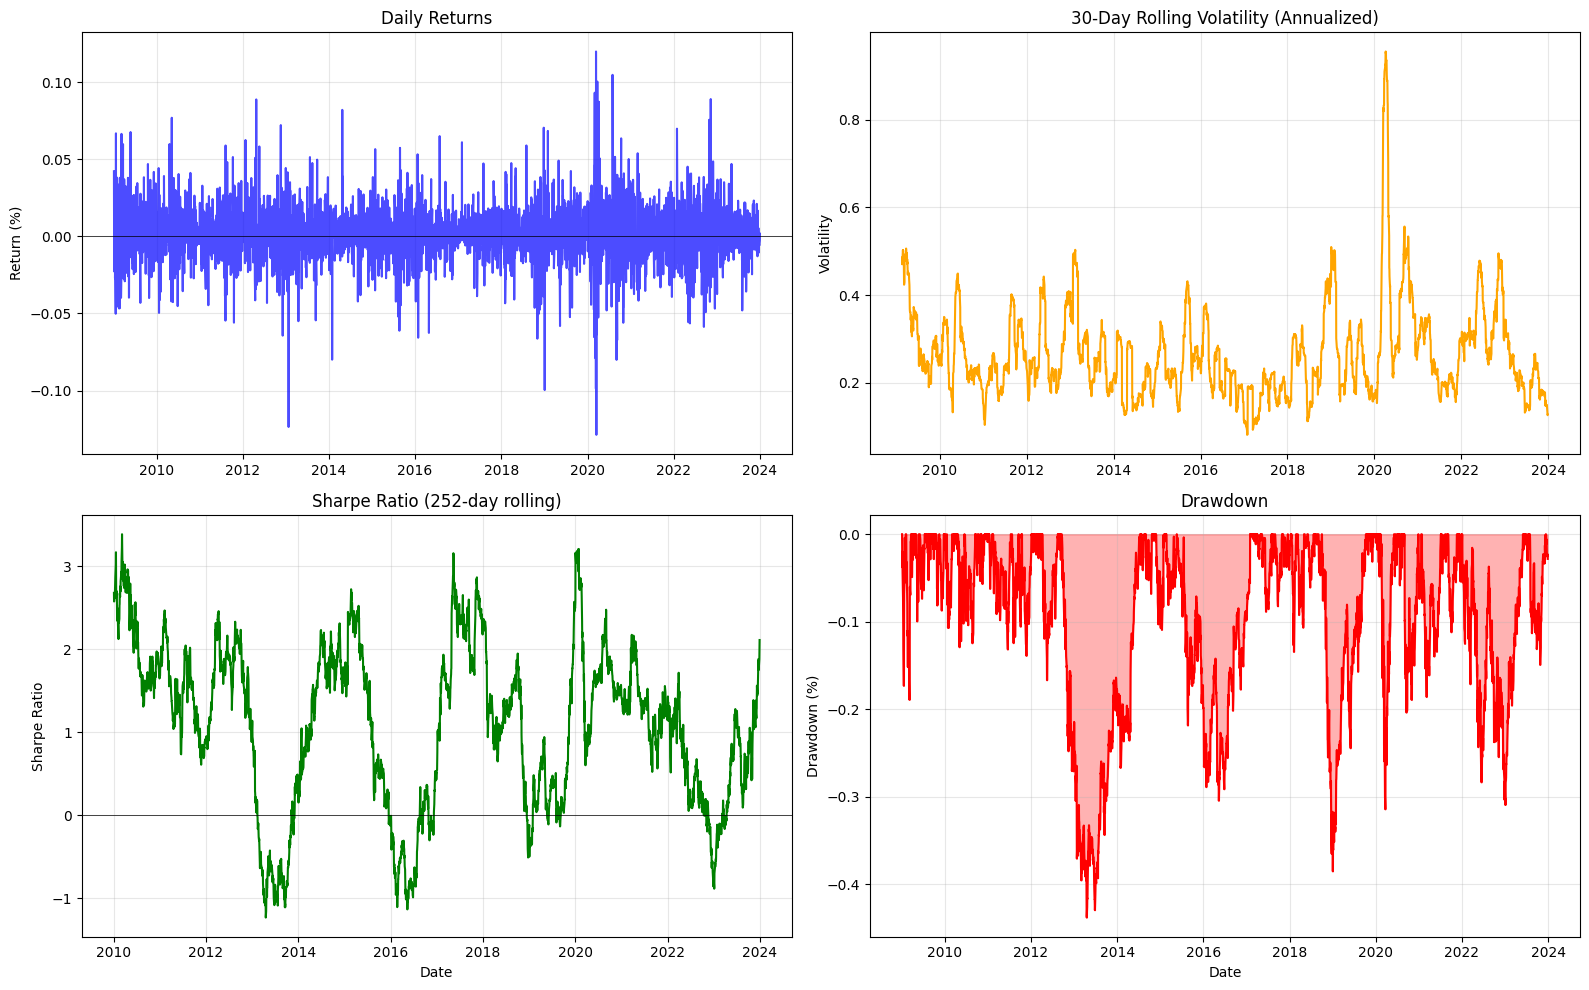

In [ ]:


# Visualize Financial Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Daily Returns
ax1 = axes[0, 0]
ax1.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['Daily_Return'], alpha=0.7, color='blue')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_title('Daily Returns', fontsize=12)
ax1.set_ylabel('Return (%)')
ax1.grid(True, alpha=0.3)

# Volatility
ax2 = axes[0, 1]
ax2.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['Volatility_30d'], color='orange')
ax2.set_title('30-Day Rolling Volatility (Annualized)', fontsize=12)
ax2.set_ylabel('Volatility')
ax2.grid(True, alpha=0.3)

# Sharpe Ratio
ax3 = axes[1, 0]
ax3.plot(aapl_with_metrics['Date'],
         aapl_with_metrics['Sharpe_Ratio'], color='green')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.set_title('Sharpe Ratio (252-day rolling)', fontsize=12)
ax3.set_ylabel('Sharpe Ratio')
ax3.set_xlabel('Date')
ax3.grid(True, alpha=0.3)

# Drawdown
ax4 = axes[1, 1]
ax4.fill_between(aapl_with_metrics['Date'], aapl_with_metrics['Drawdown'], 0,
                 color='red', alpha=0.3)
ax4.plot(aapl_with_metrics['Date'], aapl_with_metrics['Drawdown'], color='red')
ax4.set_title('Drawdown', fontsize=12)
ax4.set_ylabel('Drawdown (%)')
ax4.set_xlabel('Date')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:


# Calculate indicators for all stocks
stocks_with_indicators = {}
for symbol, stock_df in stocks.items():
    print(f"Processing {symbol}...")
    stock_with_indicators = add_technical_indicators(
        stock_df,
        indicators=['SMA_50', 'RSI']
    )
    stock_with_metrics = add_financial_metrics(
        stock_with_indicators,
        metrics=['returns', 'volatility']
    )
    stocks_with_indicators[symbol] = stock_with_metrics

print(
    f"\nProcessed {len(stocks_with_indicators)} stocks with technical indicators")

Processing AAPL...
Processing MSFT...
Processing GOOG...
Processing AMZN...
Processing META...
Processing NVDA...

Processed 6 stocks with technical indicators


# Task 3: Correlation between News Sentiment and Stock Movement


In [44]:
# Load all stocks
stocks = load_multiple_stocks(data_dir, symbols)
print(f"Loaded {len(stocks)} stocks")
for symbol, df in stocks.items():
    print(
        f"{symbol}: {len(df)} rows, Date range: {df['Date'].min()} to {df['Date'].max()}")


# Load all stocks
stocks = load_multiple_stocks(data_dir, symbols)
print(f"Loaded {len(stocks)} stocks")
for symbol, stock_df in stocks.items():
    print(
        f"{symbol}: {len(stock_df)} rows, Date range: {stock_df['Date'].min()} to {stock_df['Date'].max()}")

Loaded 6 stocks
AAPL: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
MSFT: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
GOOG: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
AMZN: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
META: 2923 rows, Date range: 2012-05-18 00:00:00 to 2023-12-29 00:00:00
NVDA: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
Loaded 6 stocks
AAPL: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
MSFT: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
GOOG: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
AMZN: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
META: 2923 rows, Date range: 2012-05-18 00:00:00 to 2023-12-29 00:00:00
NVDA: 3774 rows, Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00


In [ ]:
# IMPORTANT: Reload news data (df may have been overwritten in previous cells)
df = load_news("../data/raw_analyst_ratings.csv")
if 'sentiment' not in df.columns:
    df['sentiment'] = df['headline'].apply(sentiment_score)
print("News data reloaded. Shape:", df.shape)

In [ ]:
# Check unique stocks in news data
print("Stocks in news data:", df['stock'].unique()[:10])
print(f"Total unique stocks: {df['stock'].nunique()}")

# Check date range in news data
print(f"\nNews date range: {df['date'].min()} to {df['date'].max()}")

# Check date range in stock data
for symbol in symbols:
    if symbol in stocks:
        print(
            f"{symbol} date range: {stocks[symbol]['Date'].min()} to {stocks[symbol]['Date'].max()}")


# Reload news data if needed (in case df was overwritten)
if 'stock' not in df.columns or 'headline' not in df.columns:
    print("Warning: News dataframe appears to be missing columns. Reloading...")
    df = load_news("../data/raw_analyst_ratings.csv")
    # Recalculate sentiment if needed
    if 'sentiment' not in df.columns:
        df['sentiment'] = df['headline'].apply(sentiment_score)
    print("News data reloaded successfully.")

# Check unique stocks in news data
print("Stocks in news data:", df['stock'].unique()[:10])
print(f"Total unique stocks: {df['stock'].nunique()}")

# Check date range in news data
print(f"\nNews date range: {df['date'].min()} to {df['date'].max()}")

# Check date range in stock data
for symbol in symbols:
    if symbol in stocks:
        print(
            f"{symbol} date range: {stocks[symbol]['Date'].min()} to {stocks[symbol]['Date'].max()}")


# Reload news data if needed (in case df was overwritten)
if 'stock' not in df.columns or 'headline' not in df.columns:
    print("Warning: News dataframe appears to be missing columns. Reloading...")
    df = load_news("../data/raw_analyst_ratings.csv")
    # Recalculate sentiment if needed
    if 'sentiment' not in df.columns:
        df['sentiment'] = df['headline'].apply(sentiment_score)
    print("News data reloaded successfully.")

# Check unique stocks in news data
print("Stocks in news data:", df['stock'].unique()[:10])
print(f"Total unique stocks: {df['stock'].nunique()}")

# Check date range in news data
print(f"\nNews date range: {df['date'].min()} to {df['date'].max()}")

# Check date range in stock data
for symbol in symbols:
    if symbol in stocks:
        print(
            f"{symbol} date range: {stocks[symbol]['Date'].min()} to {stocks[symbol]['Date'].max()}")

KeyError: 'stock'